In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Libraries

In [19]:
import numpy as np
import pandas as pd


from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt

#Norhan
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as ltb

#Mohammed
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [20]:
dataset = pd.read_csv('/content/drive/MyDrive/frequency_domain_dataset.csv')
dataset.head()

,type,flight_month,num_of_stops,distance_bet_2_countries,one_stop_in,airline_Air India,airline_Indigo,airline_Other_airline,airline_Vistara,source_Bangalore,...,week_day_of_flight_Thursday,week_day_of_flight_Tuesday,dep_time_Afternoon,dep_time_Early morning,dep_time_Evening,dep_time_Morning,arr_time_Afternoon,arr_time_Early morning,arr_time_Evening,arr_time_Morning
0,21.968211,9.397171,10.915127,7.207805,8.910534,2.147460,-0.304287,-1.489772,-2.161963,-2.515666,...,-1.572439,3.314246,-6.723112,-0.507978,2.046486,-1.220979,-3.665920,-3.892243,1.908961,-1.675451
1,19.510445,7.935827,7.705721,4.120240,6.472301,2.664698,-2.033110,-7.054300,0.975523,-5.678547,...,-2.348906,2.548562,-1.585174,-1.440309,-5.698395,1.433913,0.250539,-3.791776,-0.656475,-1.894473
2,18.903724,6.740078,8.503417,3.045836,0.966997,0.365709,1.236881,7.272308,-4.278353,2.212048,...,-0.349983,-7.343616,-2.306721,-2.383942,-2.025790,-0.550653,3.256038,0.691327,-0.858851,2.346301
3,18.516803,6.718740,7.899125,1.763773,3.005050,-0.819628,1.689385,5.048732,2.705056,-5.258484,...,-7.638793,-1.229014,-4.277095,-1.536128,-3.283047,1.428720,4.404044,-1.786701,1.834281,1.498442
4,17.306994,5.180707,4.116039,2.879292,3.254312,3.303236,-3.496376,1.019531,1.992297,-0.128834,...,1.064574,-5.814801,-7.965111,-3.614308,-2.209697,-5.587788,-1.259579,-2.661001,5.912162,-0.709381


In [21]:
labels = pd.read_csv('/content/drive/MyDrive/one_hot_encoded_dataset.csv')

# **Spliting the Dataset**

In [22]:
dataset.shape

(240197, 33)

In [23]:
y_train = labels['formatted_price'][:192167]
y_test = labels['formatted_price'][192167:]

# dataset.drop(columns=['formatted_price'],axis=1,inplace=True)

x_train = dataset[:192167]
x_test = dataset[192167:]

# **Visualization**

In [24]:
def compare_orgin_predict(y_test,y_pred,N=40):
  x_ax = range(len(y_test[:N]))
  plt.plot(x_ax, y_test[:N], label="original")
  plt.plot(x_ax, y_pred[:N], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

# **Modeling**

In [25]:
models = {
    #Norhan
    "XGBR": XGBRegressor(),
    "PR"  : linear_model.PoissonRegressor(),
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: XGBR
[20:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score: 0.8888951178639636
Test Score: 0.9104253411376091
r2_score: 0.9104253411376091
MSE: 46109586.42271929
RMSE: 6790.403995545426
MAE: 5032.901890828961
----------------------------------------


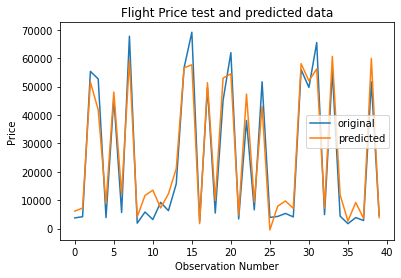

----------------------------------------
Using model: PR
Training Score: 0.9296331044336545
Test Score: 0.9477643650542491
r2_score: 0.9401381252478965
MSE: 30814588.884435233
RMSE: 5551.08898185169
MAE: 3671.5077817450347
----------------------------------------


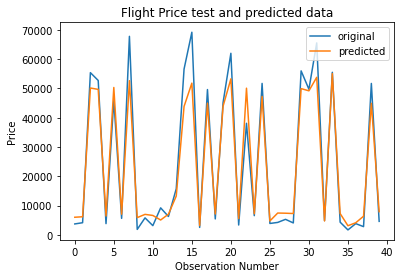

----------------------------------------
Using model: HGBR
Training Score: 0.9391101795886325
Test Score: 0.9535106876082259
r2_score: 0.9535106876082259
MSE: 23930908.52575181
RMSE: 4891.9227841158545
MAE: 3205.8039962986586
----------------------------------------


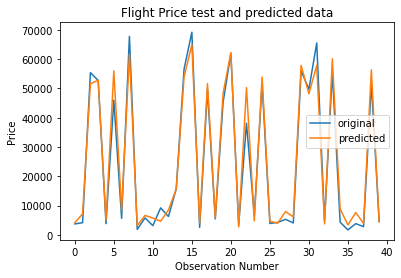

----------------------------------------
Using model: LGBMR
Training Score: 0.939700210073035
Test Score: 0.9533212815213505
r2_score: 0.9533212815213505
MSE: 24028407.488546476
RMSE: 4901.877955288817
MAE: 3213.57518927739
----------------------------------------


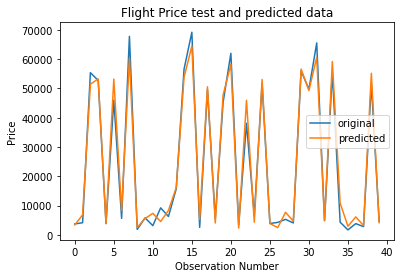

----------------------------------------
Using model: LR
Training Score: 0.9037755762476423
Test Score: 0.9213048340653007
r2_score: 0.9213048340653007
MSE: 40509242.24328545
RMSE: 6364.687128467938
MAE: 4244.97070580887
----------------------------------------


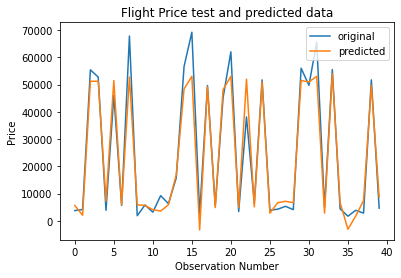

----------------------------------------
Using model: GBR
Training Score: 0.8883237961426306
Test Score: 0.9101904990784496
r2_score: 0.9101904990784496
MSE: 46230474.075098
RMSE: 6799.299528267452
MAE: 5027.293004884572
----------------------------------------


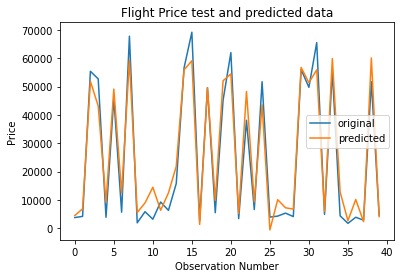

----------------------------------------
Using model: ETR
Training Score: 0.9619845843983686
Test Score: 0.9680381513168556
r2_score: 0.9680381513168556
MSE: 16452729.408094848
RMSE: 4056.196421291115
MAE: 2097.5910843125152
----------------------------------------


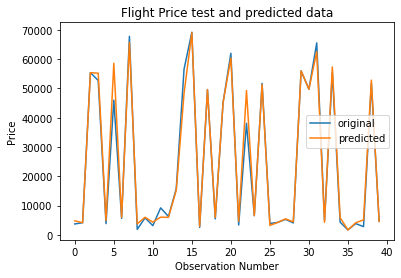

----------------------------------------
Using model: BR
Training Score: 0.9610467086208209
Test Score: 0.9665068913193182
r2_score: 0.9665068913193182
MSE: 17240963.112680566
RMSE: 4152.22387554917
MAE: 2135.576049999615
----------------------------------------


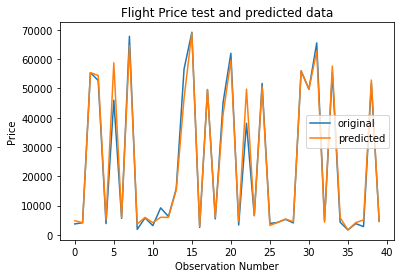

----------------------------------------
Using model: DT
Training Score: 0.9619845843983685
Test Score: 0.9641110809209675
r2_score: 0.9641110809209675
MSE: 18474234.08483024
RMSE: 4298.166363093714
MAE: 2115.943830630758
----------------------------------------


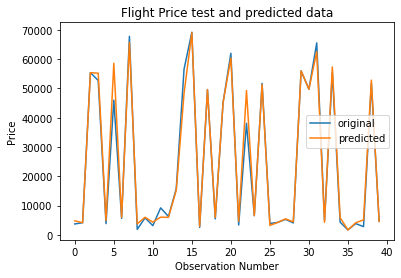

----------------------------------------
Using model: RF
Training Score: 0.9616360623854687
Test Score: 0.9671140345179565
r2_score: 0.9671140345179565
MSE: 16928429.164529134
RMSE: 4114.417232674529
MAE: 2122.973686412318
----------------------------------------


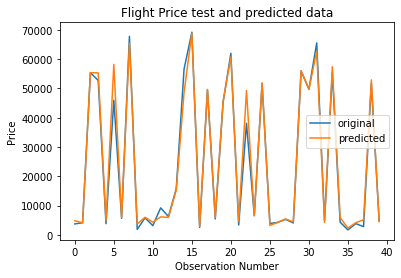

----------------------------------------


In [26]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)

    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)


